# Homework: Code your own Least Squares Method

True parameters:
  m = 1.8769947564364386  b = 1.1244434678543147

Manual Least Squares:
  m = 2.1215287009999106  b = 0.9601594219320674

NumPy polyfit:
  m = 2.1215287009999106  b = 0.9601594219320675

Largest positive residual:
  X = 0.28  Y = 2.6019928446023854  Residual = 1.0478053863903432

Largest negative residual:
  X = 0.73  Y = 1.6285884879185673  Residual = -0.8802868857434347


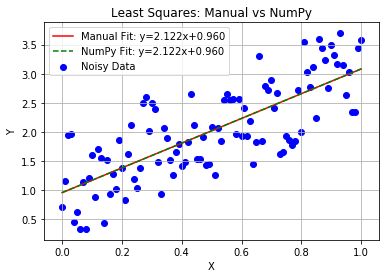

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------
# 1. Generate random linear function and noisy data
# ---------------------------------------------------
np.random.seed(3)

m_true = np.random.uniform(0.5, 3.0)
b_true = np.random.uniform(-1.0, 2.0)

X = np.arange(0, 1.01, 0.01)
X = np.sort(X)

noise = np.random.uniform(-1, 1, len(X))
Y = m_true * X + b_true + noise

# ---------------------------------------------------
# 2. Implement Least Squares manually
# ---------------------------------------------------

# I used Copilot for this last section. Create a manual version of Least Squares
# method which then compares to python's built in Least square solver.
n = len(X)
sum_x = np.sum(X)
sum_y = np.sum(Y)
sum_xy = np.sum(X * Y)
sum_x2 = np.sum(X * X)

m_manual = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
b_manual = (sum_y - m_manual * sum_x) / n

# ---------------------------------------------------
# 3. NumPy comparison
# ---------------------------------------------------
m_np, b_np = np.polyfit(X, Y, 1)

# ---------------------------------------------------
# 4. Residuals
# ---------------------------------------------------
Y_pred = m_manual * X + b_manual
residuals = Y - Y_pred

max_res_idx = np.argmax(residuals)
min_res_idx = np.argmin(residuals)

print("True parameters:")
print("  m =", m_true, " b =", b_true)
print("\nManual Least Squares:")
print("  m =", m_manual, " b =", b_manual)
print("\nNumPy polyfit:")
print("  m =", m_np, " b =", b_np)

print("\nLargest positive residual:")
print("  X =", X[max_res_idx], " Y =", Y[max_res_idx], " Residual =", residuals[max_res_idx])

print("\nLargest negative residual:")
print("  X =", X[min_res_idx], " Y =", Y[min_res_idx], " Residual =", residuals[min_res_idx])

# ---------------------------------------------------
# 5. Plot
# ---------------------------------------------------
plt.scatter(X, Y, color='blue', label='Noisy Data')
plt.plot(X, Y_pred, color='red', label=f'Manual Fit: y={m_manual:.3f}x+{b_manual:.3f}')
plt.plot(X, m_np * X + b_np, color='green', linestyle='--',
         label=f'NumPy Fit: y={m_np:.3f}x+{b_np:.3f}')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Least Squares: Manual vs NumPy")
plt.legend()
plt.grid(True)
plt.show()